In [2]:
import pandas as pd
import os
PUZZLE_PATH = os.getenv('PUZZLE_PATH')

df = pd.read_csv(PUZZLE_PATH, nrows=10)
board_fen = df['FEN'][0]
df.head(1)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN


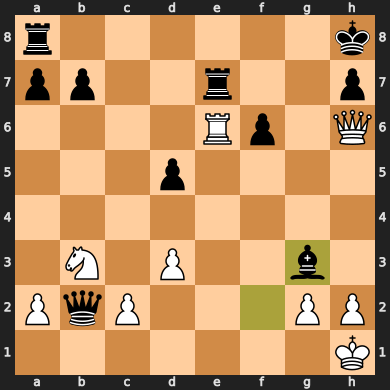

In [3]:
import chess 

board = chess.Board(board_fen)
solution = df['Moves'][0].split(' ')
board.push_san(solution[0])
legal_moves = [board.san(move) for move in board.legal_moves]
board

In [4]:
board.turn

True

In [5]:
print(type(chess.Move.from_uci(solution[1])))
print(type(list(board.legal_moves)[0]))

<class 'chess.Move'>
<class 'chess.Move'>


In [6]:
print(board.san(chess.Move.from_uci(solution[1])))
print(legal_moves)
len(legal_moves)

Rxe7
['Qf8+', 'Qxh7+', 'Qg7+', 'Qg6', 'Qxf6+', 'Qh5', 'Qg5', 'Qh4', 'Qf4', 'Qh3', 'Qe3', 'Qd2', 'Qc1', 'Rxe7', 'Rxf6', 'Rd6', 'Rc6', 'Rb6', 'Ra6', 'Re5', 'Re4', 'Re3', 'Re2', 'Re1', 'Nc5', 'Na5', 'Nd4', 'Nd2', 'Nc1', 'Na1', 'Kg1', 'hxg3', 'd4', 'h3', 'c3', 'a3', 'h4', 'c4', 'a4']


39

In [7]:
board_fen = board.fen()
board_fen

'r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - - 0 25'

In [8]:
f"Here's a chess board FEN string: {board_fen}"

"Here's a chess board FEN string: r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - - 0 25"

In [9]:
board.san(chess.Move.from_uci(solution[1]))

'Rxe7'

In [10]:
import requests
import json


OPENROUTER_API_KEY = os.environ.get('OPENROUTER_API_KEY')

response = requests.post(
  url="https://openrouter.ai/api/v1/chat/completions",
  headers={
    "Authorization": f"Bearer {OPENROUTER_API_KEY}",
  },
  data=json.dumps({
    "model": "deepseek/deepseek-r1-zero:free", 
    "messages": [
      {
        "role": "system",	
        "content": f"Here's a chess board FEN string: {board_fen}"
      },
      {
        "role": "system",
        "content": f"Here are the SAN legal moves for white: {', '.join(legal_moves)}"
      },
      {
          "role": "system",
          "content": f"What is the best move for white? Answer only with one move in SAN"
      },
      {
          "role": "assistant",
          "content": "move: "
      }
    ],
    "temperature": 0.0
  })
)


In [11]:
response_json = response.json()
response_json

{'id': 'gen-1742244479-mguqOwkMPURdyc0MArb6',
 'provider': 'Chutes',
 'model': 'deepseek/deepseek-r1-zero',
 'object': 'chat.completion',
 'created': 1742244479,
 'choices': [{'logprobs': None,
   'finish_reason': 'stop',
   'native_finish_reason': 'stop',
   'index': 0,
   'message': {'role': 'assistant',
    'content': '1. Qf8+ (This move checks the black king and forces a response. After Qf8+, if black responds with Rxf8, white can play Rxe7 which wins a rook and still keeps the pressure on black. Another possible response for black is Kh8, which leads to Qxf6 where white wins a rook and still has a strong attack. However, another line could be Kh7 where white can play Qxf6 again, winning a rook and maintaining a strong position. However, a more direct checkmate sequence can be verified here:\n\n1. Qf8+ Rxf8 (forced if black wants to avoid immediate checkmate)\n2. Rxe7 (white wins a rook and still has a strong position)\n\nHowever, another important line is:\n1. Qf8+ Kh7\n2. Qxf6 (a

In [12]:
content = response_json['choices'][0]['message']['content']
content

'1. Qf8+ (This move checks the black king and forces a response. After Qf8+, if black responds with Rxf8, white can play Rxe7 which wins a rook and still keeps the pressure on black. Another possible response for black is Kh8, which leads to Qxf6 where white wins a rook and still has a strong attack. However, another line could be Kh7 where white can play Qxf6 again, winning a rook and maintaining a strong position. However, a more direct checkmate sequence can be verified here:\n\n1. Qf8+ Rxf8 (forced if black wants to avoid immediate checkmate)\n2. Rxe7 (white wins a rook and still has a strong position)\n\nHowever, another important line is:\n1. Qf8+ Kh7\n2. Qxf6 (again, white wins a rook and has a strong position)\n\nHowever, another candidate move that seems very strong is:\n1. Qxh7+ Kxh7\n2. Rh6# (checkmate)\n\nHowever, we need to verify if the black king can escape after Qxh7+. \n\n1. Qxh7+ Kxh7\n2. Rh6# is a checkmate because:\n   - After Qxh7+, if Kxh7, the white rook on e6 ch

In [13]:
import re
content = content.strip()  # trim extra whitespace
# updated regex to capture moves including captures, e.g., "Qxf6+"
match = re.search(r'(?:move:\s*)?([KQRBN]?(?:[a-h][1-8]|[a-h]?x[a-h][1-8])[+#]?)', content).group(1)
match


'Qf8+'

In [14]:
match in legal_moves

True

In [15]:
match == board.san(chess.Move.from_uci(solution[1]))

False